## CAPSTONE PROJECT - Christian Caton


In [1]:
import platform

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
import dataframe_image as dfi
import mplcyberpunk
from scipy.sparse import csr_matrix

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from scipy import stats
from sklearn.metrics.pairwise import linear_kernel # for cosine similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
## Import the Data ##
df = pd.read_csv('games_of_all_time.csv')

## EDA

In [3]:
## Check the DataFrame ##
df.head()

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+


In [4]:
## Checking for Duplicates ##
df.drop_duplicates('game_name', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(10)

,game_name,meta_score,user_score,platform,description,url,developer,genre,type,rating
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",https://www.metacritic.com/game/nintendo-64/th...,Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,https://www.metacritic.com/game/wii/super-mari...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",https://www.metacritic.com/game/wii/super-mari...,Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,https://www.metacritic.com/game/gamecube/metro...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,https://www.metacritic.com/game/switch/super-m...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",https://www.metacritic.com/game/xbox/halo-comb...,Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M
6,The House in Fata Morgana - Dreams of the Reve...,97.0,83.0,['switch'],A gothic suspense tale set in a cursed mansion...,https://www.metacritic.com/game/switch/the-hou...,HuneX,"['Adventure', 'Visual Novel']",singleplayer,M
7,NFL 2K1,97.0,62.0,['dreamcast'],"In the end, NFL 2K1 is a deeper, more refined ...",https://www.metacritic.com/game/dreamcast/nfl-2k1,Visual Concepts,"['Sports', 'Traditional', 'Football', 'Sim']",NaN,E
8,Uncharted 2: Among Thieves,96.0,88.0,['playstation-3'],Fortune hunter Nathan Drake returns in Unchart...,https://www.metacritic.com/game/playstation-3/...,Naughty Dog,"['Action Adventure', 'Modern', 'Linear']",singleplayer,T
9,Tekken 3,96.0,91.0,['playstation'],"An ancient evil force has reawakened, attackin...",https://www.metacritic.com/game/playstation/te...,Namco,"['Action', 'Fighting', '3D']",multiplayer,T


In [5]:
## Shape of the DataFrame ##
df.shape

(8831, 10)

In [6]:
## Drop the URL column as it is unnecessary ##
df.drop(['url'],axis = 1, inplace = True)

In [7]:
df2 = df.copy()

In [8]:
## Checking DataTypes ##
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8831 entries, 0 to 8830
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   game_name    8831 non-null   object 
 1   meta_score   8831 non-null   float64
 2   user_score   8831 non-null   float64
 3   platform     8831 non-null   object 
 4   description  8831 non-null   object 
 5   developer    8821 non-null   object 
 6   genre        8827 non-null   object 
 7   type         6727 non-null   object 
 8   rating       7691 non-null   object 
dtypes: float64(2), object(7)
memory usage: 621.1+ KB


In [9]:
## Summary stats - Numerical Values in the Data ##
df2.describe()

,meta_score,user_score
count,8831.000000,8831.000000
mean,70.876621,69.903918
std,12.181944,13.161456
min,11.000000,2.000000
25%,63.000000,63.000000
50%,73.000000,72.800000
75%,80.000000,79.000000
max,99.000000,98.000000


In [10]:
## Checking Null Counts ##
df2.isnull().sum()

game_name         0
meta_score        0
user_score        0
platform          0
description       0
developer        10
genre             4
type           2104
rating         1140
dtype: int64

In [11]:
## Percentage of missing values per column ##
percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df2 = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df2

,column_name,percent_missing
game_name,game_name,0.000000
meta_score,meta_score,0.000000
user_score,user_score,0.000000
platform,platform,0.000000
description,description,0.000000
developer,developer,0.113237
genre,genre,0.045295
type,type,23.825161
rating,rating,12.909070


In [12]:
## Checking unique values for Rating ##
df['rating'].unique()

array(['E', 'T', 'E10+', 'M', nan, 'K-A', 'RP', 'AO'], dtype=object)

In [13]:
## Checking unique values for Type ##
df2['type'].unique()

array(['singleplayer', 'multiplayer', nan], dtype=object)

In [14]:
## Fill the null values for EDA as it is not too important what the null values represent in this data ##
df2.fillna('null', inplace=True)

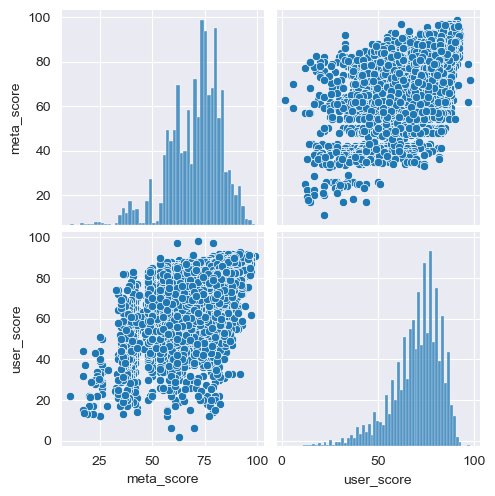

In [15]:
## Check the distributions of the score data - Seems to be Normal Distribution ##
sns.pairplot(df2)
plt.show()

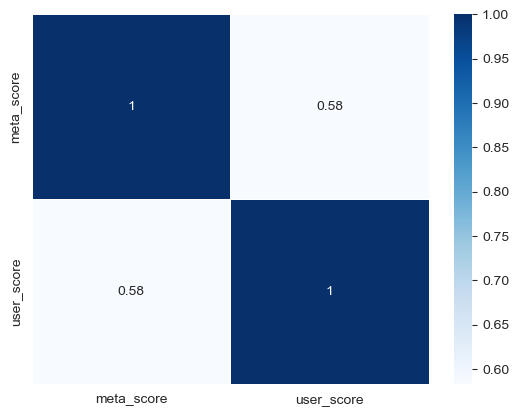

In [16]:
## Heatmap correlations between score data ##
sns.heatmap(df2.corr(),annot=True,linewidths=0.5, cmap='Blues')
plt.show()

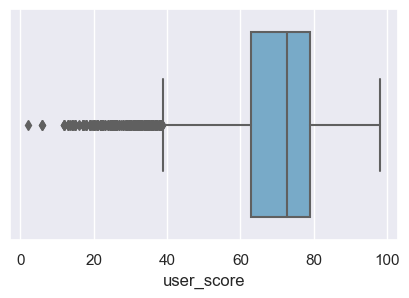

In [17]:
## Check the outliers - user_score ##
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.boxplot(data=df2, x='user_score', palette='Blues')
plt.show()
## As they are described as scores, I can't really define these lower scores as outliers as they are the true score to some games ##

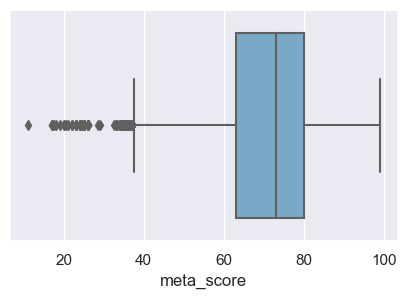

In [18]:
## Check the outliers - meta_score ##
plt.figure(figsize = (5,3))
sns.set(font_scale=1)
sns.boxplot(data=df2, x='meta_score', palette='Blues')
plt.show()

## Visualise Features - Used for Motivation

In [19]:
## scores per rating ##
df2[['rating','user_score', 'meta_score']].groupby(["rating"],as_index=False).mean().sort_values(by=['user_score','meta_score'],ascending=True)

,rating,user_score,meta_score
0,AO,34.000000,41.000000
5,RP,65.335714,66.880714
7,null,67.838772,71.714175
2,E10+,69.426330,70.454761
1,E,70.007507,70.527600
4,M,70.368599,71.743713
6,T,70.648938,70.503392
3,K-A,81.583333,85.416667


In [20]:
## scores per type ##
df2[['type','user_score', 'meta_score']].groupby(["type"],as_index=False).mean().sort_values(by=['user_score', 'meta_score'],ascending=True)

,type,user_score,meta_score
1,null,67.351141,69.411991
0,multiplayer,70.364000,71.527762
2,singleplayer,71.009328,71.159561


In [21]:
## Finding the highest and lowest user score game ##
def find_minmax(x):
    min_index = df2[x].idxmin()
    high_index = df2[x].idxmax()
    high = pd.DataFrame(df2.loc[high_index,:])
    low = pd.DataFrame(df2.loc[min_index,:])
    return pd.concat([high,low],axis = 1)

find_minmax('user_score')

,4340,3133
game_name,After Burner Climax,Madden NFL 21
meta_score,72.0,63.0
user_score,98.0,2.0
platform,['xbox-360'],['playstation-4']
description,The classic arcade game After Burner has now r...,Innovative new gameplay mechanics in Madden NF...
developer,Sega AM2,EA Sports
genre,"['Simulation', 'Flight', 'Modern Jet', 'Combat']","['Sports', 'Team', 'Football', 'Sim']"
type,null,multiplayer
rating,E10+,E


In [22]:
## Top 10 games with the highest meta scores ##
meta = pd.DataFrame(df2['meta_score'].sort_values(ascending=False))
meta['game_name'] = df2['game_name']
data = list(map(str,(meta['game_name'])))
meta

,meta_score,game_name
0,99.0,The Legend of Zelda: Ocarina of Time
2,97.0,Super Mario Galaxy 2
3,97.0,Metroid Prime
4,97.0,Super Mario Odyssey
5,97.0,Halo: Combat Evolved
...,...,...
7306,17.5,Ride to Hell: Retribution
4257,17.0,Yaris
4256,17.0,Vroom in the Night Sky
4255,17.0,Double Dragon II: Wander of the Dragons


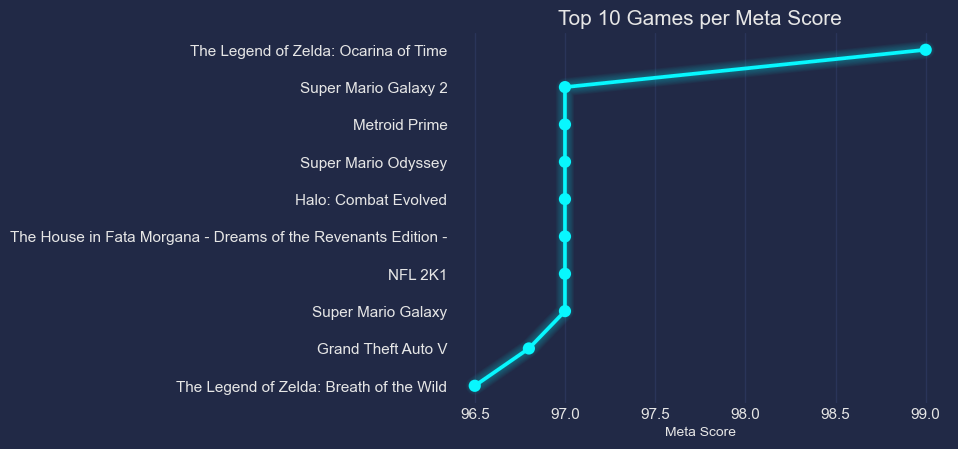

In [23]:
## Plot top 10 games with the highest meta scores ##
x = list(data[:10])
y = list(meta['meta_score'][:10])

plt.style.use("cyberpunk")

ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(12,7)})
ax.set_title('Top 10 Games per Meta Score', fontsize = 15)
ax.set_xlabel('Meta Score',fontsize = 10)


mplcyberpunk.make_lines_glow(ax)
plt.show()

In [24]:
## Top 10 games with the highest user scores ##
user = pd.DataFrame(df2['user_score'].sort_values(ascending=False))
user['game_name'] = df2['game_name']
data1 = list(map(str,(user['game_name'])))
user

,user_score,game_name
4340,98.0,After Burner Climax
5847,97.0,GrimGrimoire
3214,97.0,Metal Torrent
8267,92.7,The Witcher 3: Wild Hunt
786,92.0,Suikoden II
...,...,...
3752,12.0,Call of Duty: Modern Warfare 3 - Defiance
1407,12.0,FIFA 21
6410,6.0,Madden NFL 22
3535,6.0,Warcraft III: Reforged


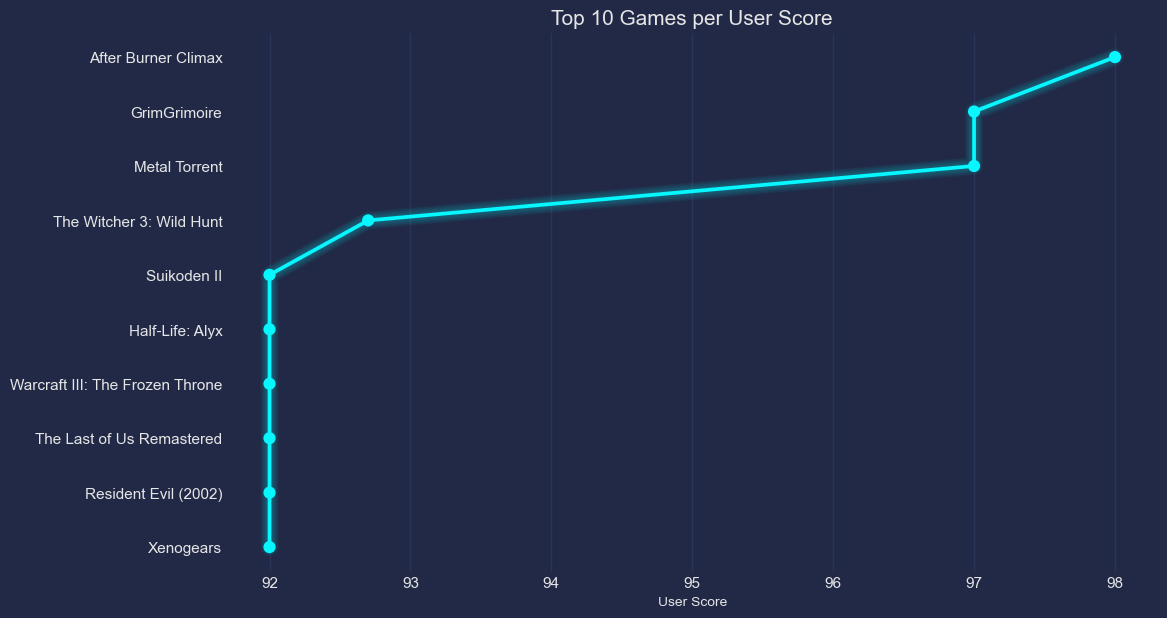

In [25]:
## Plot top 10 games with the highest user scores ##
x1 = list(data1[:10])
y1 = list(user['user_score'][:10])

plt.style.use("cyberpunk")

ax = sns.pointplot(x=y1,y=x1)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title('Top 10 Games per User Score', fontsize = 15)
ax.set_xlabel('User Score',fontsize = 10)


mplcyberpunk.make_lines_glow(ax)
plt.show()

Developer

In [26]:
## Top 10 developers with the highest user scores ##
dev = pd.DataFrame(df2['user_score'].sort_values(ascending=False))
dev['developer'] = df2['developer']
data2 = list(map(str,(dev['developer'])))
dev

,user_score,developer
4340,98.0,Sega AM2
5847,97.0,Vanilla Ware
3214,97.0,Arika
8267,92.7,CD Projekt Red Studio
786,92.0,Konami
...,...,...
3752,12.0,n-Space
1407,12.0,Electronic Arts
6410,6.0,EA Tiburon
3535,6.0,Blizzard Entertainment


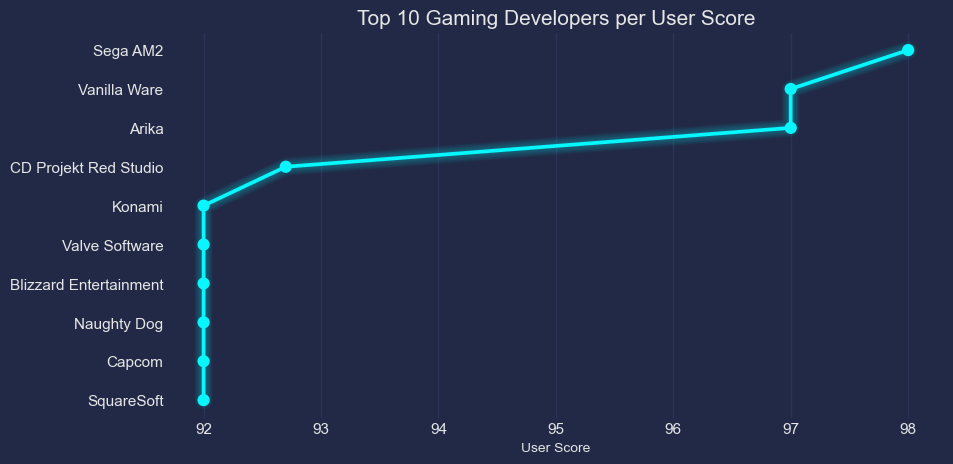

In [27]:
## Plot top 10 developers with the highest user scores ##
x2 = list(data2[:10])
y2 = list(dev['user_score'][:10])

plt.style.use("cyberpunk")

ax = sns.pointplot(x=y2,y=x2)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title('Top 10 Gaming Developers per User Score', fontsize = 15)
ax.set_xlabel('User Score',fontsize = 10)


mplcyberpunk.make_lines_glow(ax)
plt.show()

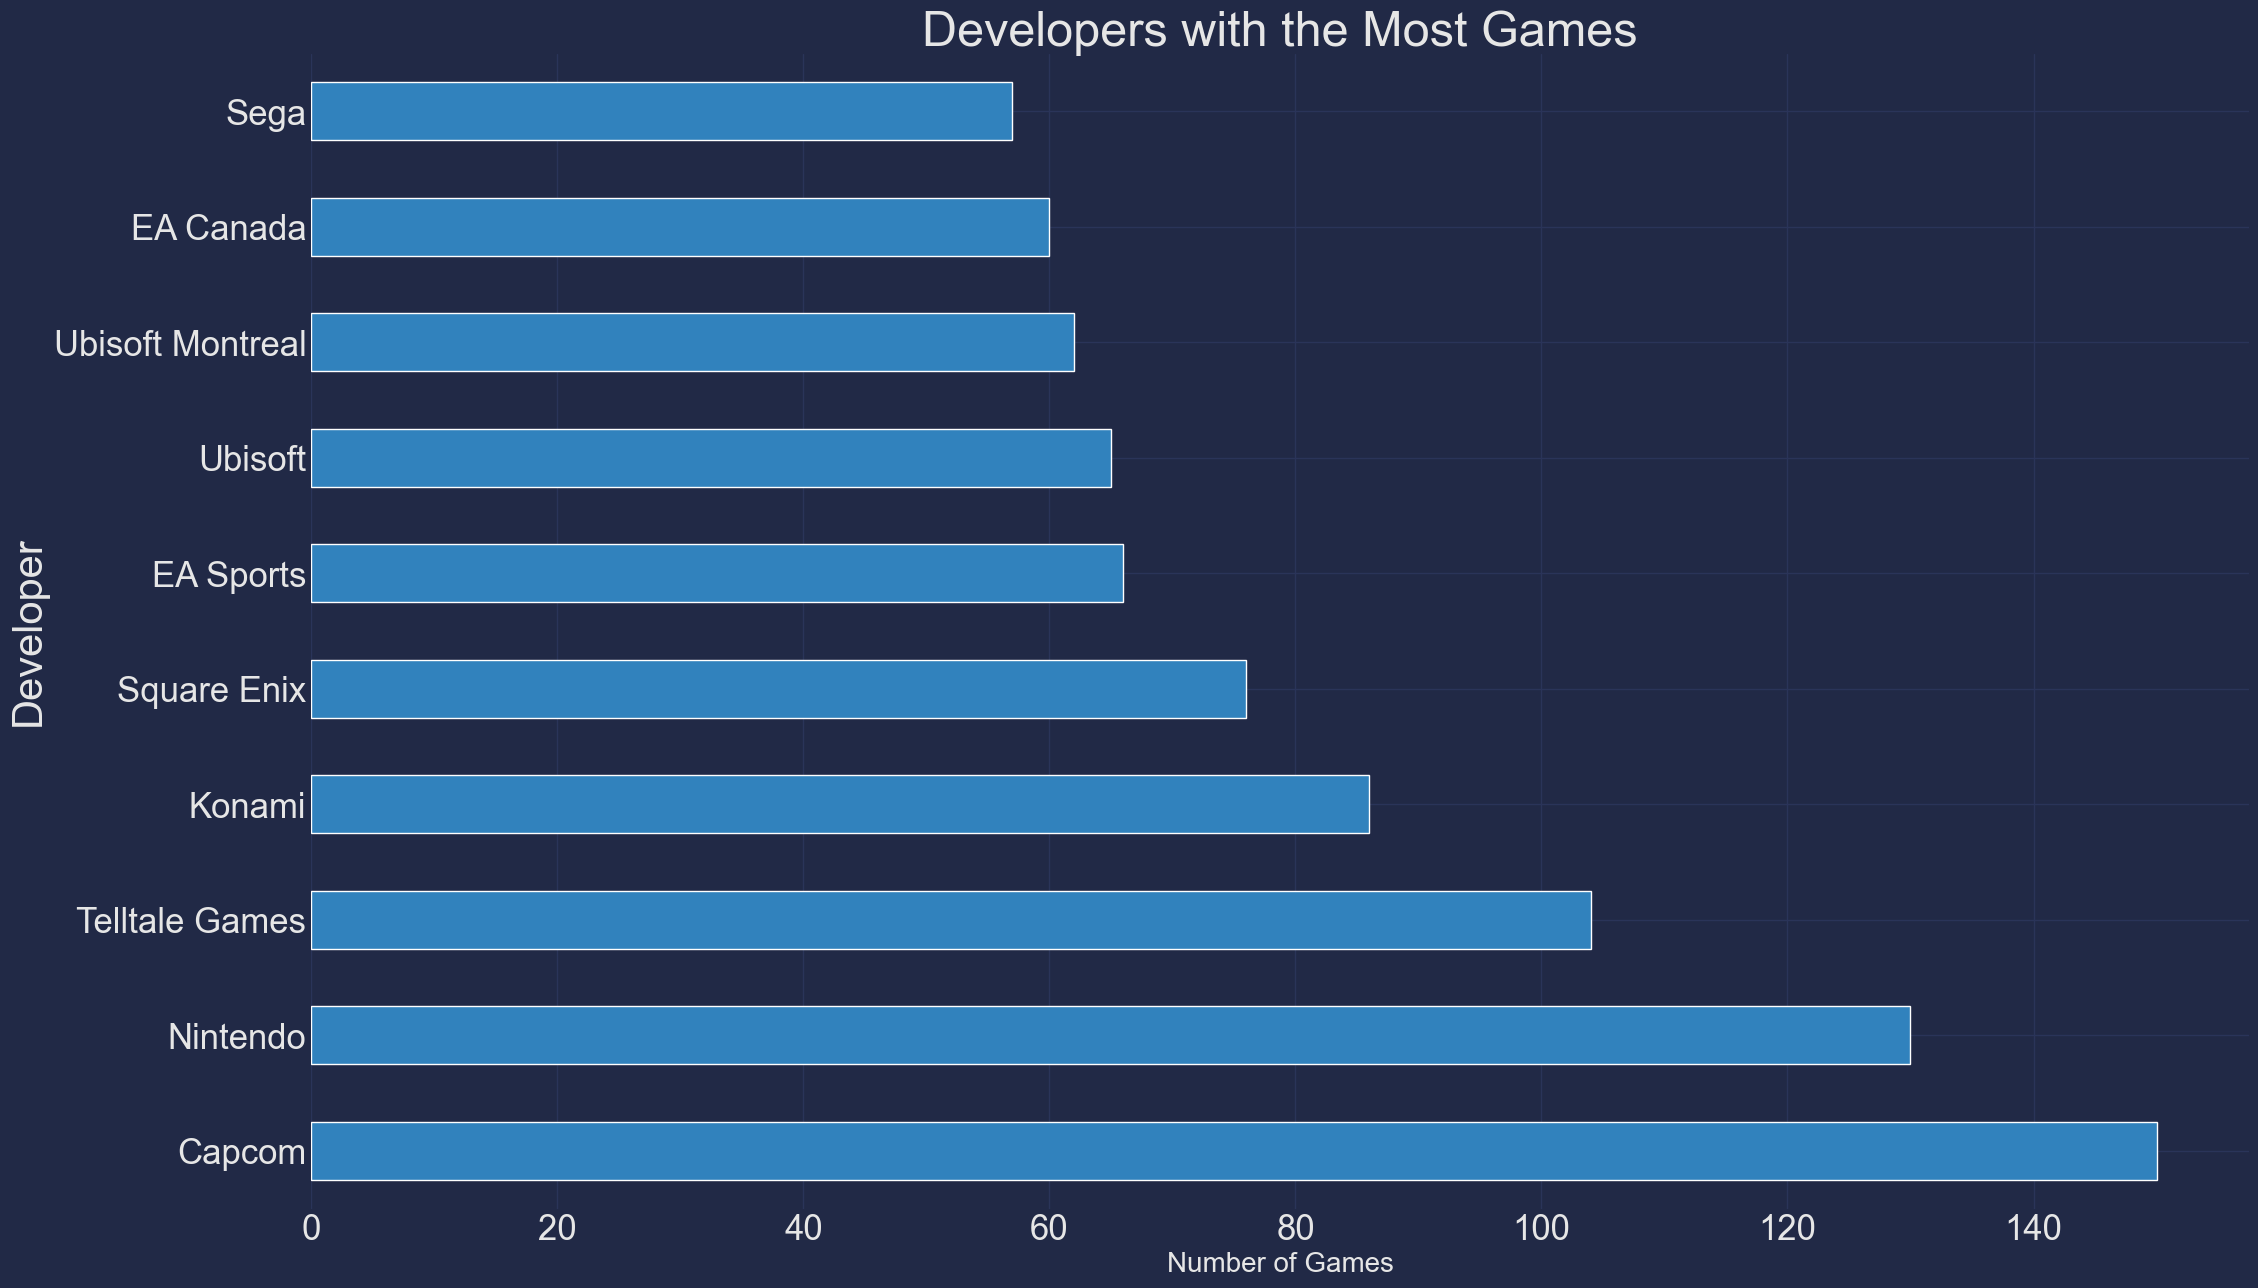

In [28]:
## Plotting platforms with the most games ##
plt.style.use("cyberpunk")
total_dev = df2['developer'].value_counts()[:10]
total_dev.plot(kind='barh',figsize=(25,15),
                    fontsize=25, colormap = 'tab20c', edgecolor='white')
plt.title('Developers with the Most Games', fontsize = 35)
plt.xlabel('Number of Games', fontsize = 20)
plt.ylabel('Developer', fontsize = 30)
sns.set_style('darkgrid')
plt.show()

Platform

In [29]:
## Top 10 platforms with the highest user scores ##
plat1 = pd.DataFrame(df2['user_score'].sort_values(ascending=False))
plat1['platform'] = df2['platform']
data3 = list(map(str,(plat1['platform'])))
plat1

,user_score,platform
4340,98.0,['xbox-360']
5847,97.0,['playstation-2']
3214,97.0,['ds']
8267,92.7,"['pc', 'playstation-4', 'xbox-one']"
786,92.0,['playstation']
...,...,...
3752,12.0,['ds']
1407,12.0,['xbox-one']
6410,6.0,['xbox-series-x']
3535,6.0,['pc']


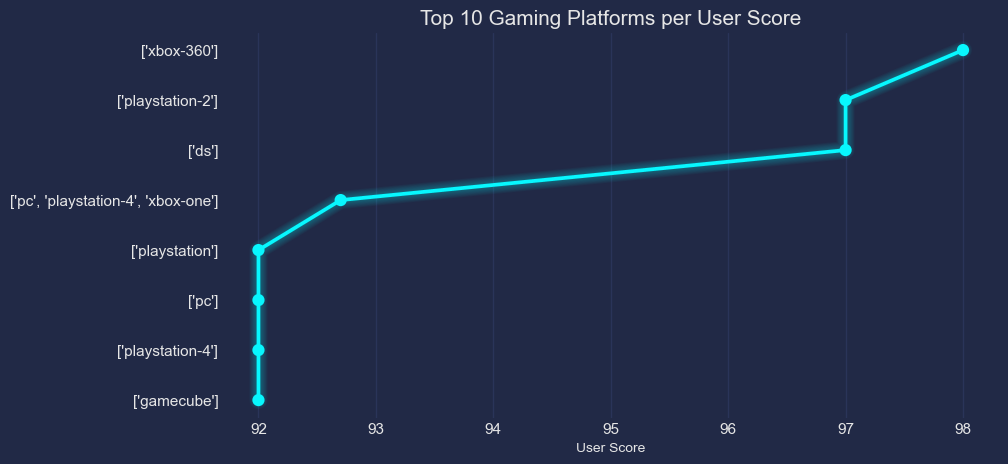

In [30]:
## Plot top 10 platforms with the highest user scores ##
x3 = list(data3[:10])
y3 = list(plat1['user_score'][:10])

plt.style.use("cyberpunk")

ax = sns.pointplot(x=y3,y=x3)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title('Top 10 Gaming Platforms per User Score', fontsize = 15)
ax.set_xlabel('User Score',fontsize = 10)


mplcyberpunk.make_lines_glow(ax)
plt.show()

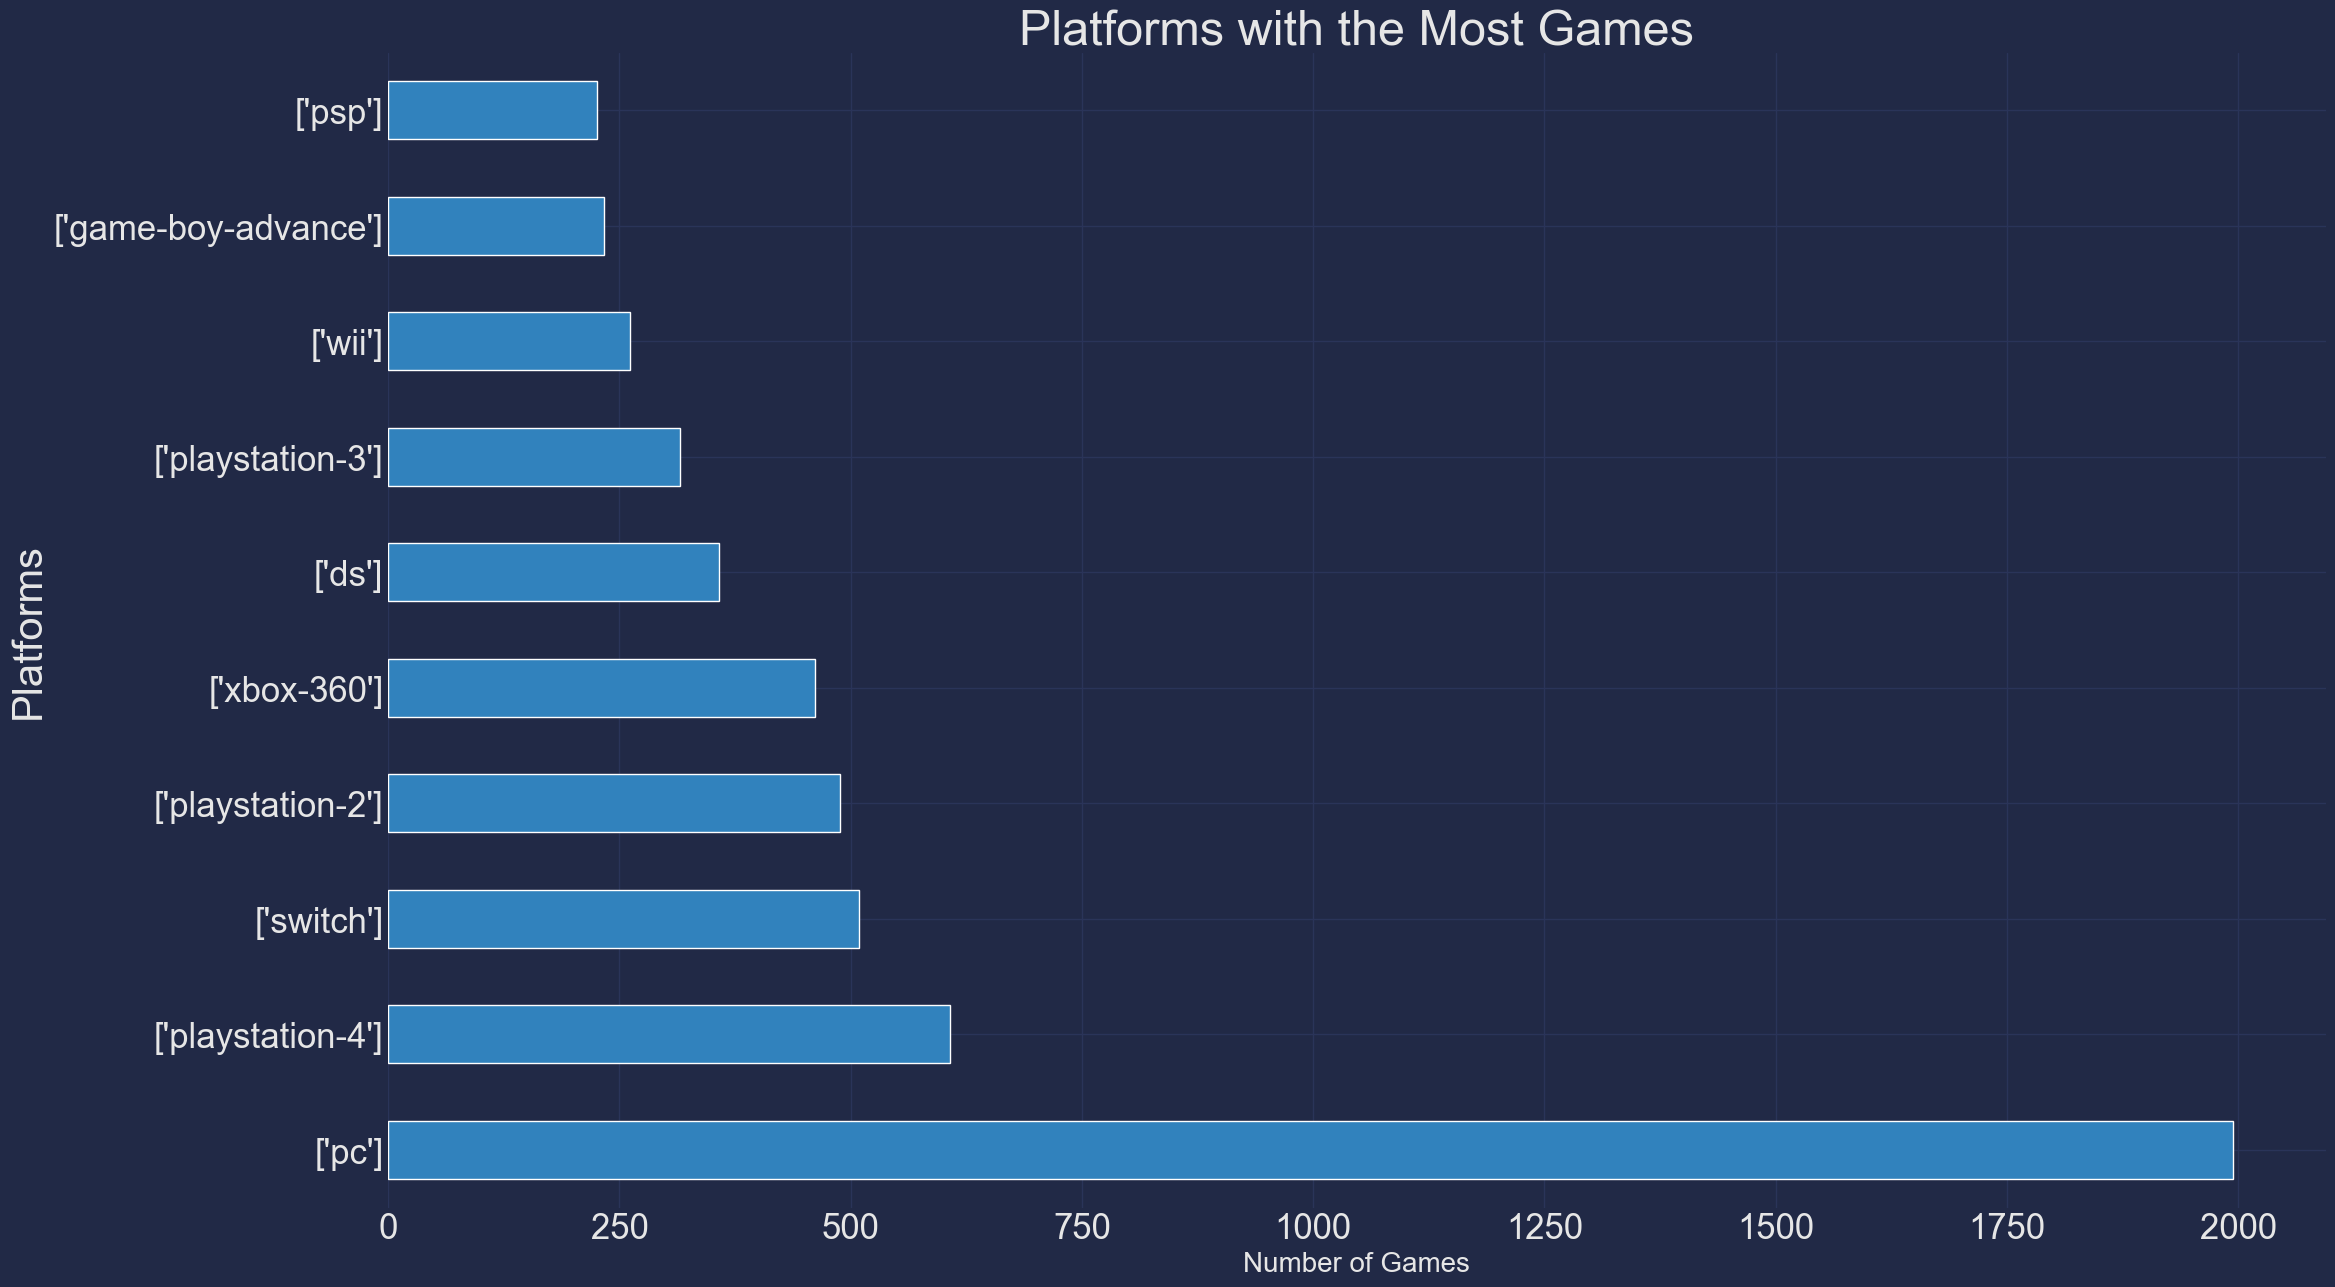

In [31]:
## Plotting platforms with the most games ##
plt.style.use("cyberpunk")
total_platform = df2['platform'].value_counts()[:10]
total_platform.plot(kind='barh',figsize=(25,15),
                    fontsize=25, colormap = 'tab20c', edgecolor='white')
plt.title('Platforms with the Most Games', fontsize = 35)
plt.xlabel('Number of Games', fontsize = 20)
plt.ylabel('Platforms', fontsize = 30)
sns.set_style('darkgrid')
plt.show()

Genre

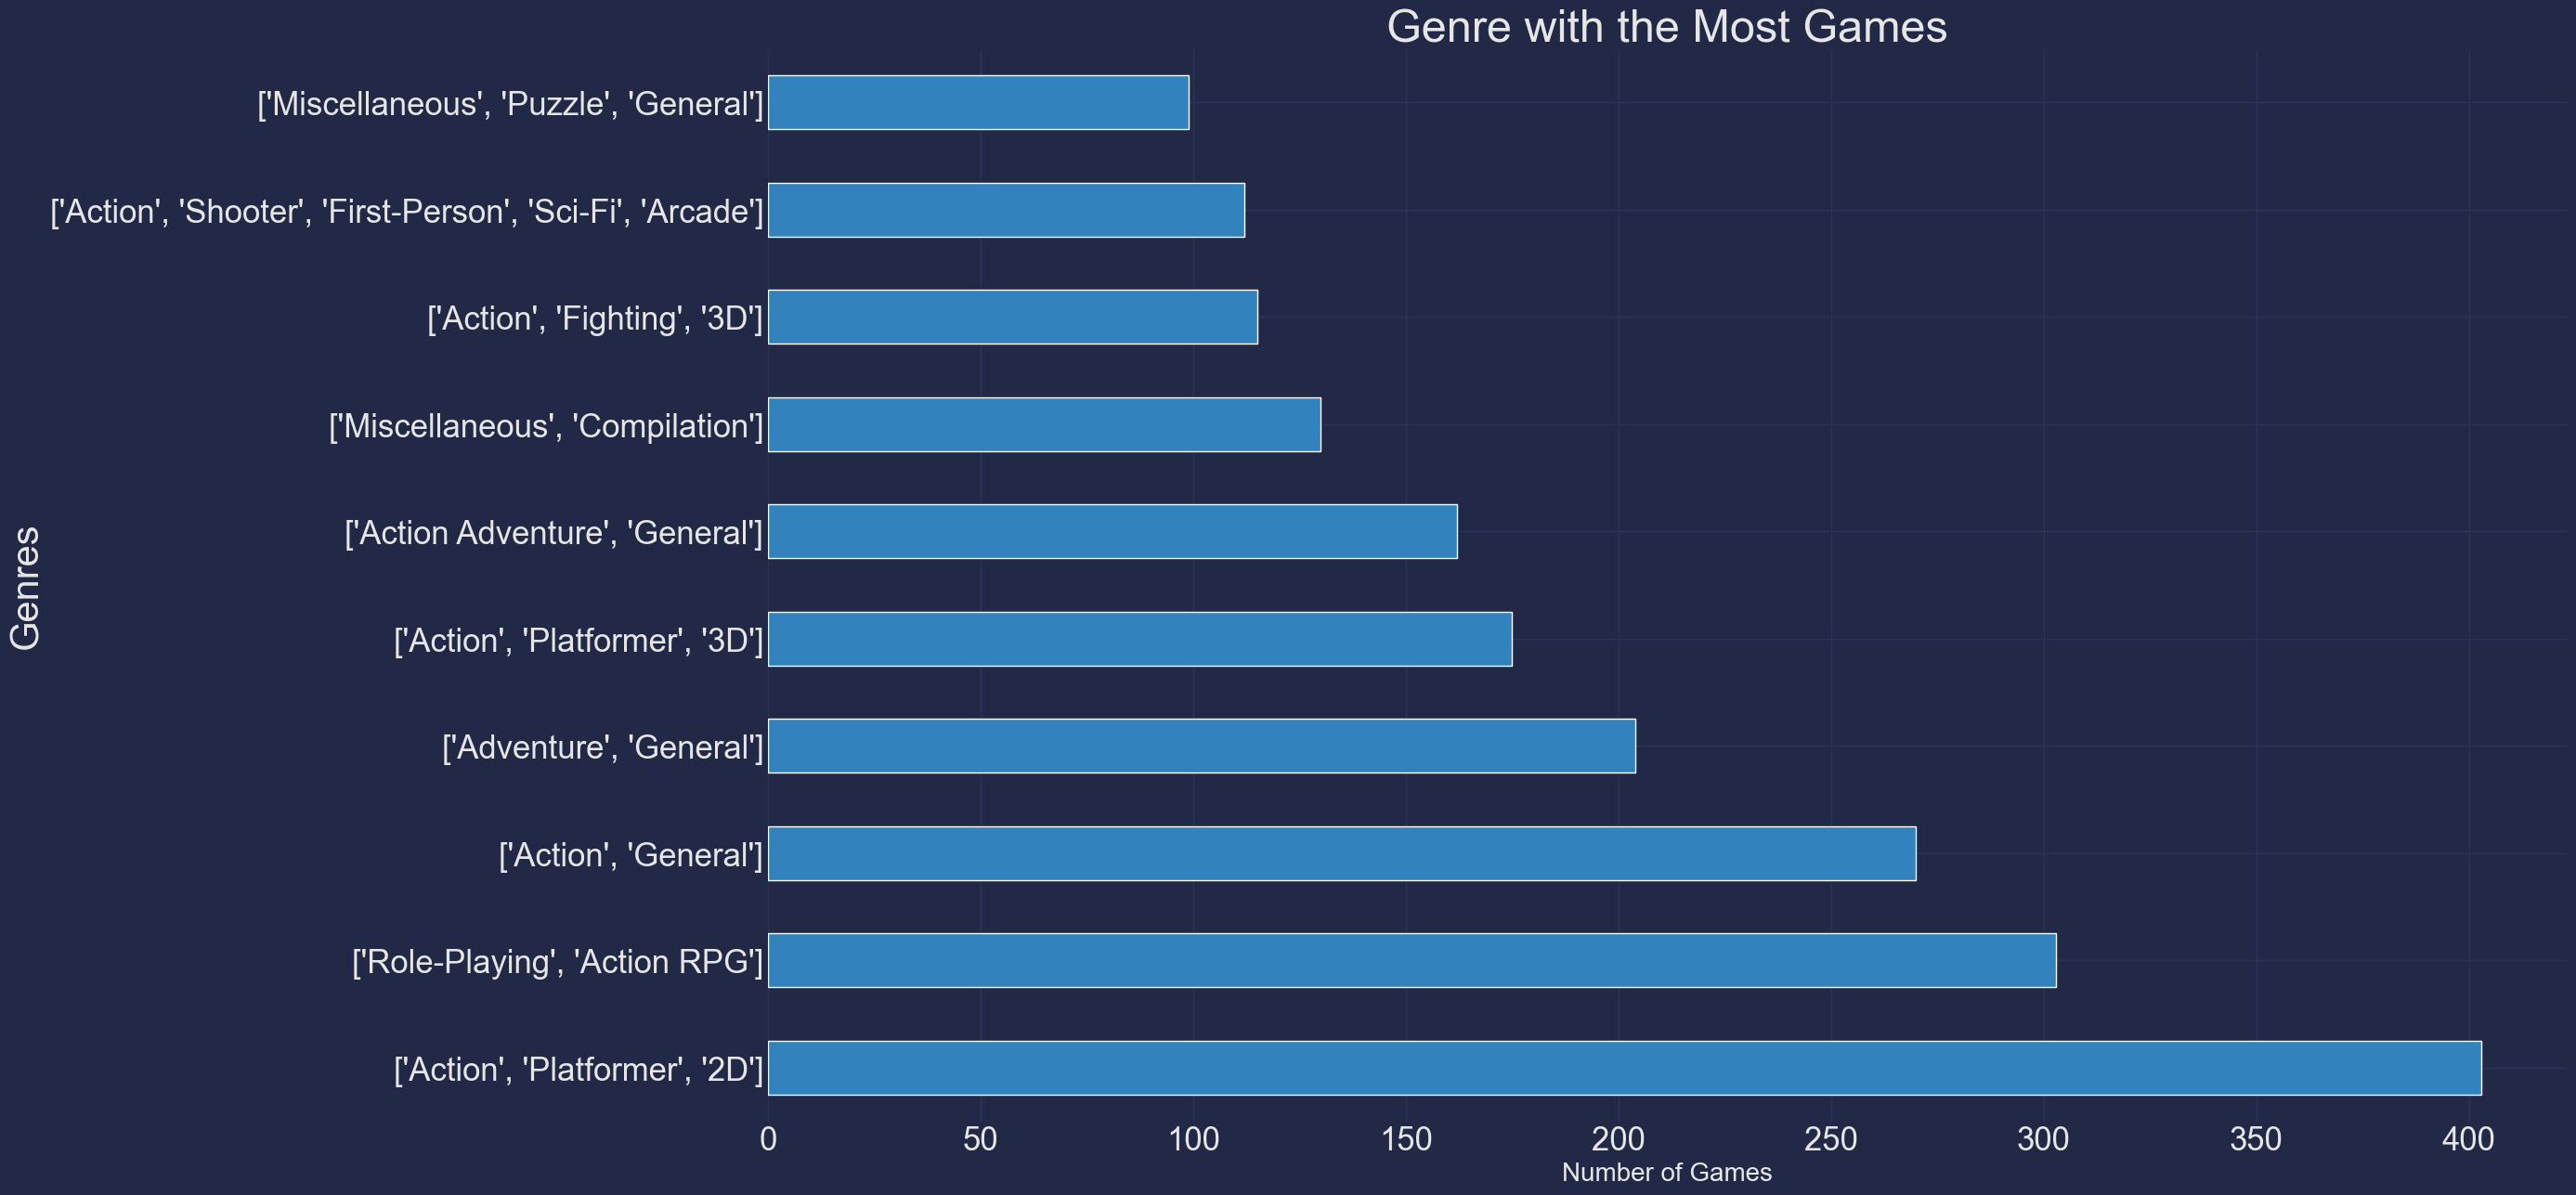

In [32]:
## Plotting genre with the most games ##
plt.style.use("cyberpunk")
total_genre = df2['genre'].value_counts()[:10]
total_genre.plot(kind='barh',figsize=(25,15),
                 fontsize=25, colormap = 'tab20c', edgecolor='white')
plt.title('Genre with the Most Games', fontsize = 35)
plt.xlabel('Number of Games', fontsize = 20)
plt.ylabel('Genres', fontsize = 30)
sns.set_style('darkgrid')
plt.show()

Ratings

In [33]:
# T =    Teen 13 and over
# E =    Everyone 6 and over
# M =    Mature 17 and over
# E10+ = Everyone 10 and over
# RP =   Rating Pending
# K-A =  Kids to Adults (was replaced by the everyone rating)
# AO =   18 years and over

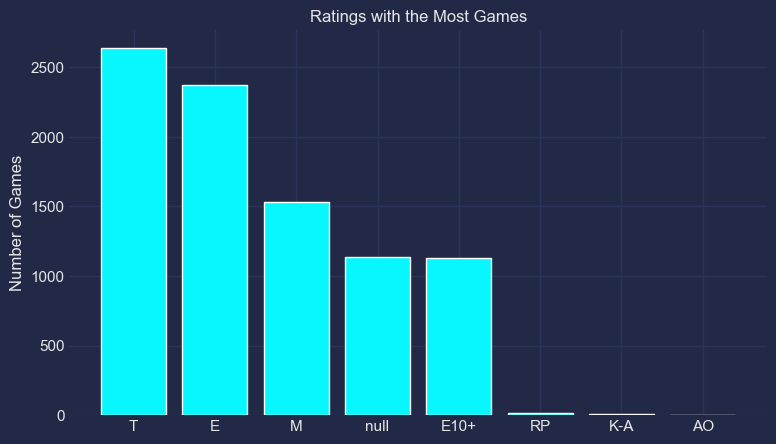

In [34]:
## Plotting Ratings with the most games ##
total_rating = df2['rating'].value_counts()
plt.style.use("cyberpunk")
plt.figure(figsize=(9,5))
plt.bar(total_rating.index,total_rating)
plt.xticks(total_rating.index,total_rating.index.values)
plt.ylabel("Number of Games")
plt.title('Ratings with the Most Games')
plt.show()

Game Types

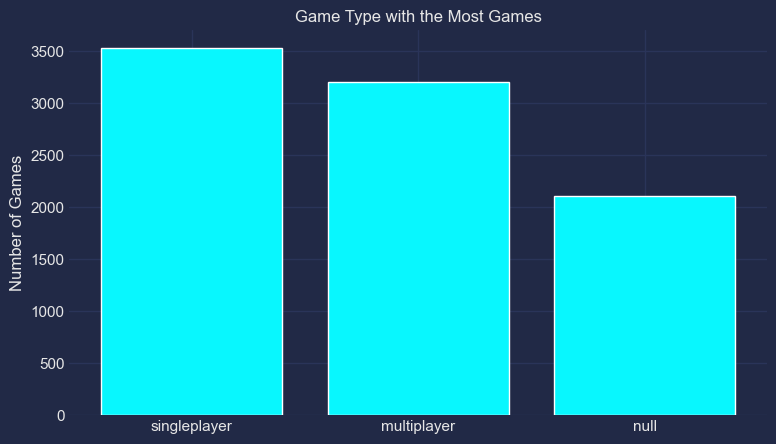

In [35]:
## Plotting game types with the most games ##
total_type = df2['type'].value_counts()
plt.style.use("cyberpunk")
plt.figure(figsize=(9,5))
plt.bar(total_type.index,total_type)
plt.xticks(total_type.index,total_type.index.values)
plt.ylabel("Number of Games")
plt.title('Game Type with the Most Games')
plt.show()

/Users/christiancaton/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christiancaton/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 70.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christiancaton/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 47.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christiancaton/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 55.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/christiancato

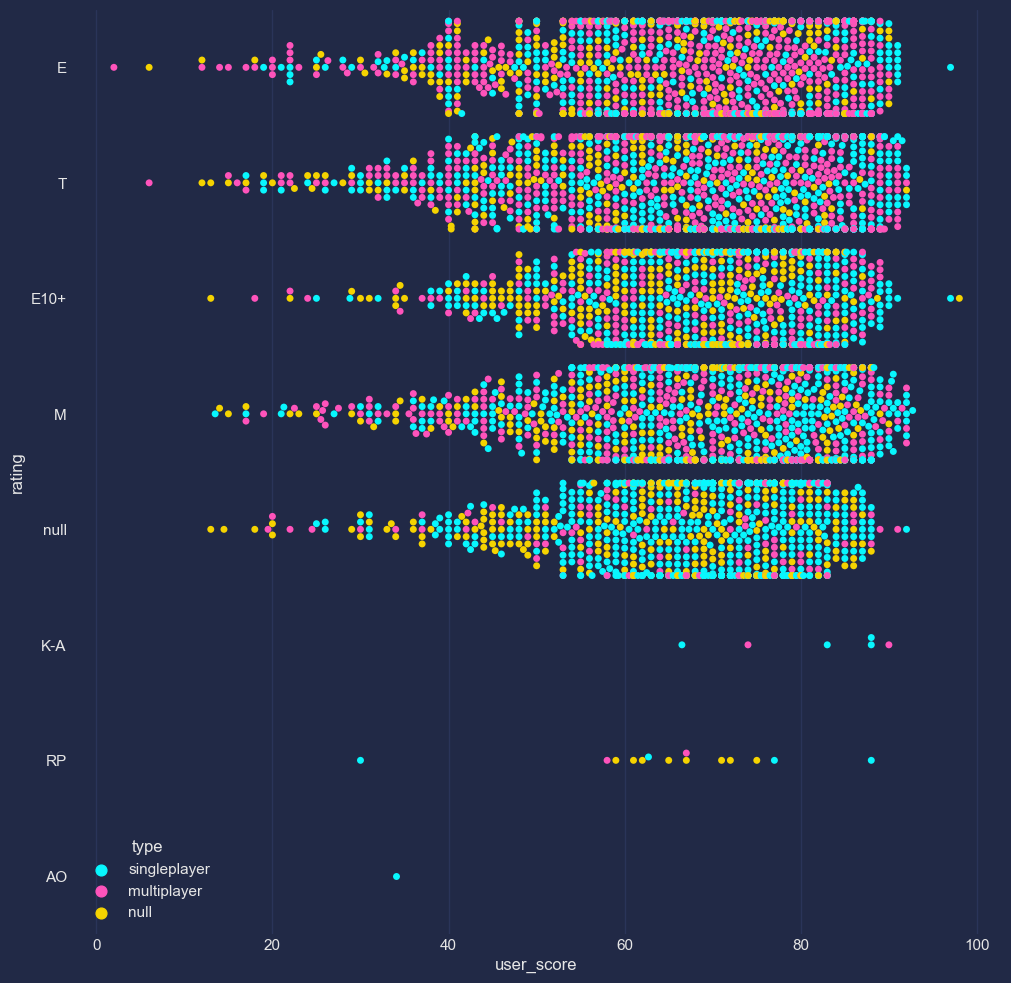

In [36]:
## We can also see the distribution of popularity – the user_scores based on the age rating and type of game ##
plt.style.use("cyberpunk")
plt.figure(figsize=(12,12))
ax=sns.swarmplot(y="rating",x="user_score",hue="type",data=df2)
plt.show()

## We can see Teens at the top have have a lot more purple spots which signifies they prefer more multiplayer based games ##

## MODELLING

## Content-Based Recommender

Feature Engineering and Cleaning of Game Description Column

In [37]:
# NLP Function - Cleaning Process

def nlp_prep(df2, text):

    # Create a new temporary column of text description #
    df2['new'] = df2[text].astype(str)
    # Convert to text to lowercase
    new = (x.lower() for x in df2['new'])
    df2['new'] = [i for i in new]

    # Tokenization
    token_x = (word_tokenize(x) for x in df2['new'])
    token_x = [i for i in token_x]

    ## Remove Punctuation ##
    reg = re.compile('(@[a-z0-9]+)|([^0-9a-z \t])|(\w+:\/\/\S+)')

    no_punc = []
    for f in token_x:
        review = []
        for token in f:
            new_token = reg.sub(u'', token)
            if not new_token == u'':
                review.append(new_token)
        no_punc.append(review)

    ## Remove Stopwords ##
    stop = []

    for post in no_punc:
        new_term_vector = []
        for word in post:
            if not word in stopwords.words('english'):
                new_term_vector.append(word)
        stop.append(new_term_vector)

    # Stemming & Lemmatization
    pstem = PorterStemmer()
    lem = WordNetLemmatizer()

    clean_text = []

    for text in stop:
        final_text = []
        for word in text:
            pstem.stem(word)
            final_text.append(lem.lemmatize(word))

        clean_text.append(final_text)


    ## Create new column of cleaned description ##
    new_col = pd.Series(clean_text)
    df2['clean_description'] = new_col
    df2.drop('new', axis=1, inplace=True)
    return df2

## Apply Function
df_nlp = nlp_prep(df2, 'description')

In [38]:
## Reset index and check new dataframe ##
df_nlp.reset_index(drop=True, inplace=True)
df_nlp.head(10)

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,clean_description
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,"[young, boy, link, tricked, ganondorf, king, g..."
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,"[metacritic, 2007, wii, game, year, ultimate, ..."
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,"[super, mario, galaxy, 2, sequel, galaxyhoppin..."
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,"[samus, return, new, mission, unravel, mystery..."
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,"[new, evolution, mario, sandboxstyle, gameplay..."
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M,"[enter, mysterious, world, halo, alien, planet..."
6,The House in Fata Morgana - Dreams of the Reve...,97.0,83.0,['switch'],A gothic suspense tale set in a cursed mansion...,HuneX,"['Adventure', 'Visual Novel']",singleplayer,M,"[gothic, suspense, tale, set, cursed, mansion,..."
7,NFL 2K1,97.0,62.0,['dreamcast'],"In the end, NFL 2K1 is a deeper, more refined ...",Visual Concepts,"['Sports', 'Traditional', 'Football', 'Sim']",null,E,"[end, nfl, 2k1, deeper, refined, version, orig..."
8,Uncharted 2: Among Thieves,96.0,88.0,['playstation-3'],Fortune hunter Nathan Drake returns in Unchart...,Naughty Dog,"['Action Adventure', 'Modern', 'Linear']",singleplayer,T,"[fortune, hunter, nathan, drake, return, uncha..."
9,Tekken 3,96.0,91.0,['playstation'],"An ancient evil force has reawakened, attackin...",Namco,"['Action', 'Fighting', '3D']",multiplayer,T,"[ancient, evil, force, reawakened, attacking, ..."


Modelling

In [39]:
## TF-IDF Vectorizer ##
tfidf = TfidfVectorizer()

## Build the TF-IDF matrix by fitting and transforming the clean_description data ##
tfidf_matrix = tfidf.fit_transform([str(i) for i in df_nlp['clean_description']])

''' matrix where each column represents a word, and each row represents a game '''

## Matrix shape ##
tfidf_matrix.shape

(8831, 33278)

In [40]:
## Compute cosine similarity score matrix using Linear Kernel ##
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.01884204,
        0.01012708],
       [0.        , 1.        , 0.24273132, ..., 0.02373573, 0.01817572,
        0.        ],
       [0.        , 0.24273132, 1.        , ..., 0.        , 0.01273234,
        0.        ],
       ...,
       [0.        , 0.02373573, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.01884204, 0.01817572, 0.01273234, ..., 0.        , 1.        ,
        0.        ],
       [0.01012708, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [41]:
## Reverse map the index as the game_name - This is for the recommender function ##
indices = pd.Series(df_nlp.index, index=df_nlp['game_name'])

indices.head(10)

game_name
The Legend of Zelda: Ocarina of Time                             0
Super Mario Galaxy                                               1
Super Mario Galaxy 2                                             2
Metroid Prime                                                    3
Super Mario Odyssey                                              4
Halo: Combat Evolved                                             5
The House in Fata Morgana - Dreams of the Revenants Edition -    6
NFL 2K1                                                          7
Uncharted 2: Among Thieves                                       8
Tekken 3                                                         9
dtype: int64

In [42]:
## Recommender function ##
def recommender(game_title, cosine_sim=cosine_sim):

    ## get index of video game that matches title
    indx = indices[game_title]

    ## get similarity scores of all games based on the user input game
    sim_scores = list(enumerate(cosine_sim[indx]))

    ## sort games based on similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    ## select the scores for the 10 most similar video games
    sim_scores = sim_scores[1:11]

    ## get the index of each game in the top 10
    game_indices = [i[0] for i in sim_scores]

    ## return top 10 most similar games
    recs = df_nlp['game_name'].iloc[game_indices]

    return recs

In [43]:
## Test ##
recommender('Grand Theft Auto V')

8476        Tycoon City: New York
6436                      Manhunt
6816          Need for Speed Heat
5171                  Democracy 3
7600                   Skate City
6925    Omerta: City of Gangsters
4274                   25 to Life
3639        PlayStation VR WORLDS
3846                Maximum Chase
3693               1954: Alcatraz
Name: game_name, dtype: object

In [44]:
recommender('Halo 3')

242     Halo: The Master Chief Collection - Halo 3
349              Halo: The Master Chief Collection
839                  Halo Wars: Definitive Edition
773                                      Halo Wars
5903                         Halo: Spartan Assault
5898                                        Halo 2
5                             Halo: Combat Evolved
5902                        Halo: Reach Remastered
735               Halo: Combat Evolved Anniversary
5901                                   Halo Wars 2
Name: game_name, dtype: object

In [45]:
recommender('Call of Duty')

4813                      Call of Duty: Finest Hour
4802                           Call of Duty Classic
4823                     Call of Duty: World at War
4820                             Call of Duty: WWII
4596                                  Battlefield V
4798                                 Call of Duty 2
4814                           Call of Duty: Ghosts
4800                                 Call of Duty 3
4801                 Call of Duty 4: Modern Warfare
8084    The History Channel: Battle for the Pacific
Name: game_name, dtype: object

In [46]:
recommender('The Witcher 3: Wild Hunt')

8293               Thronebreaker: The Witcher Tales
331     The Witcher 3: Wild Hunt - Complete Edition
8270                  The Witcher: Enhanced Edition
6609                            Monster Hunter Rise
1000            Monster Hunter Generations Ultimate
373                              Monster Hunter Tri
227                  Injustice 2: Legendary Edition
302                              Moto Racer Advance
604                    Overcooked! 2: Surf 'n' Turf
836                   L.A. Noire: The VR Case Files
Name: game_name, dtype: object

In [47]:
recommender('God of War')

46                       God of War II
5799             God of War Collection
844          God of War III Remastered
134      God of War: Chains of Olympus
68                      God of War III
3064                 Through the Woods
5804           Gods: Lands of Infinity
367     God of War: Origins Collection
5796                       God Eater 3
3620           Warlocks 2: God Slayers
Name: game_name, dtype: object

## Feature Selection Based Recommender

In [48]:
df_nlp.head(10)

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,clean_description
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,['nintendo-64'],"As a young boy, Link is tricked by Ganondorf, ...",Nintendo,"['Action Adventure', 'Fantasy']",singleplayer,E,"[young, boy, link, tricked, ganondorf, king, g..."
1,Super Mario Galaxy,97.0,91.0,['wii'],[Metacritic's 2007 Wii Game of the Year] The u...,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E,"[metacritic, 2007, wii, game, year, ultimate, ..."
2,Super Mario Galaxy 2,97.0,91.0,['wii'],"Super Mario Galaxy 2, the sequel to the galaxy...",Nintendo EAD Tokyo,"['Action', 'Platformer', '3D']",singleplayer,E,"[super, mario, galaxy, 2, sequel, galaxyhoppin..."
3,Metroid Prime,97.0,89.0,['gamecube'],Samus returns in a new mission to unravel the ...,Retro Studios,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",singleplayer,T,"[samus, return, new, mission, unravel, mystery..."
4,Super Mario Odyssey,97.0,89.0,['switch'],New Evolution of Mario Sandbox-Style Gameplay....,Nintendo,"['Action', 'Platformer', '3D']",singleplayer,E10+,"[new, evolution, mario, sandboxstyle, gameplay..."
5,Halo: Combat Evolved,97.0,87.0,['xbox'],"Enter the mysterious world of Halo, an alien p...",Bungie Software,"['Action', 'Shooter', 'First-Person', 'Sci-Fi']",multiplayer,M,"[enter, mysterious, world, halo, alien, planet..."
6,The House in Fata Morgana - Dreams of the Reve...,97.0,83.0,['switch'],A gothic suspense tale set in a cursed mansion...,HuneX,"['Adventure', 'Visual Novel']",singleplayer,M,"[gothic, suspense, tale, set, cursed, mansion,..."
7,NFL 2K1,97.0,62.0,['dreamcast'],"In the end, NFL 2K1 is a deeper, more refined ...",Visual Concepts,"['Sports', 'Traditional', 'Football', 'Sim']",null,E,"[end, nfl, 2k1, deeper, refined, version, orig..."
8,Uncharted 2: Among Thieves,96.0,88.0,['playstation-3'],Fortune hunter Nathan Drake returns in Unchart...,Naughty Dog,"['Action Adventure', 'Modern', 'Linear']",singleplayer,T,"[fortune, hunter, nathan, drake, return, uncha..."
9,Tekken 3,96.0,91.0,['playstation'],"An ancient evil force has reawakened, attackin...",Namco,"['Action', 'Fighting', '3D']",multiplayer,T,"[ancient, evil, force, reawakened, attacking, ..."


Feature Engineering

In [49]:
## Function to convert all selected feature strings to lower case and strip names of spaces and quotation marks ##
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "").replace("'",'')) for i in x]
    else:
        if isinstance(x, str):
            return str.lower(x.replace(" ", "").replace("'",''))
        else:
            return ''

In [50]:
## Apply clean_data function to the selected features ##
features = ['platform', 'developer', 'genre', 'type', 'rating']

for feature in features:
    df_nlp[feature] = df_nlp[feature].apply(clean_data)

In [51]:
df_nlp.head(10)

,game_name,meta_score,user_score,platform,description,developer,genre,type,rating,clean_description
0,The Legend of Zelda: Ocarina of Time,99.0,91.0,[nintendo-64],"As a young boy, Link is tricked by Ganondorf, ...",nintendo,"[actionadventure,fantasy]",singleplayer,e,"[young, boy, link, tricked, ganondorf, king, g..."
1,Super Mario Galaxy,97.0,91.0,[wii],[Metacritic's 2007 Wii Game of the Year] The u...,nintendo,"[action,platformer,3d]",singleplayer,e,"[metacritic, 2007, wii, game, year, ultimate, ..."
2,Super Mario Galaxy 2,97.0,91.0,[wii],"Super Mario Galaxy 2, the sequel to the galaxy...",nintendoeadtokyo,"[action,platformer,3d]",singleplayer,e,"[super, mario, galaxy, 2, sequel, galaxyhoppin..."
3,Metroid Prime,97.0,89.0,[gamecube],Samus returns in a new mission to unravel the ...,retrostudios,"[action,shooter,first-person,sci-fi]",singleplayer,t,"[samus, return, new, mission, unravel, mystery..."
4,Super Mario Odyssey,97.0,89.0,[switch],New Evolution of Mario Sandbox-Style Gameplay....,nintendo,"[action,platformer,3d]",singleplayer,e10+,"[new, evolution, mario, sandboxstyle, gameplay..."
5,Halo: Combat Evolved,97.0,87.0,[xbox],"Enter the mysterious world of Halo, an alien p...",bungiesoftware,"[action,shooter,first-person,sci-fi]",multiplayer,m,"[enter, mysterious, world, halo, alien, planet..."
6,The House in Fata Morgana - Dreams of the Reve...,97.0,83.0,[switch],A gothic suspense tale set in a cursed mansion...,hunex,"[adventure,visualnovel]",singleplayer,m,"[gothic, suspense, tale, set, cursed, mansion,..."
7,NFL 2K1,97.0,62.0,[dreamcast],"In the end, NFL 2K1 is a deeper, more refined ...",visualconcepts,"[sports,traditional,football,sim]",null,e,"[end, nfl, 2k1, deeper, refined, version, orig..."
8,Uncharted 2: Among Thieves,96.0,88.0,[playstation-3],Fortune hunter Nathan Drake returns in Unchart...,naughtydog,"[actionadventure,modern,linear]",singleplayer,t,"[fortune, hunter, nathan, drake, return, uncha..."
9,Tekken 3,96.0,91.0,[playstation],"An ancient evil force has reawakened, attackin...",namco,"[action,fighting,3d]",multiplayer,t,"[ancient, evil, force, reawakened, attacking, ..."


In [52]:
## Create metadata soup which is a string that contains all the metadata I want to feed into my model vectorizer ##
def create_soup(x):
    return ' '.join(x[['platform']]) + ' ' + x['developer'] + ' ' + ' '.join(x[['genre']]) + ' ' + \
        x['type'] + ' ' + x['rating']

In [53]:
## Create a new metadata soup feature ##
df_nlp['soup'] = df_nlp.apply(create_soup, axis=1)

In [54]:
## View the new feature ##
df_nlp[['soup']].head(10)

,soup
0,"[nintendo-64] nintendo [actionadventure,fantas..."
1,"[wii] nintendo [action,platformer,3d] singlepl..."
2,"[wii] nintendoeadtokyo [action,platformer,3d] ..."
3,"[gamecube] retrostudios [action,shooter,first-..."
4,"[switch] nintendo [action,platformer,3d] singl..."
5,"[xbox] bungiesoftware [action,shooter,first-pe..."
6,"[switch] hunex [adventure,visualnovel] singlep..."
7,"[dreamcast] visualconcepts [sports,traditional..."
8,"[playstation-3] naughtydog [actionadventure,mo..."
9,"[playstation] namco [action,fighting,3d] multi..."


Modelling

In [55]:
## Same steps as the Content-Based modelling apart from key difference is that you use the CountVectorizer() instead of TF-IDF ##

''' It makes sense that we don't want to down-weight any of the features
    especially if they appear more often in games. '''

## Using CountVectorizer - Create the count matrix ##
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_nlp['soup'])

In [56]:
count_matrix.shape

(8831, 3181)

In [57]:
## Compute the Cosine Similarity matrix based on the count_matrix ##
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [58]:
## Reset index of your main DataFrame and construct reverse mapping as before ##
df_nlp = df_nlp.reset_index()
indices = pd.Series(df_nlp.index, index=df_nlp['game_name'])

Results

In [59]:
recommender('Grand Theft Auto V', cosine_sim2)
## You see that your recommender has been successful in capturing more information and less occurrence of the same game
# due to more metadata features. ##

5822                     Grand Theft Auto IV
6528          Mercenaries 2: World in Flames
5825           Grand Theft Auto: San Andreas
6538    Metal Gear Solid V: The Phantom Pain
7415                           Saints Row IV
1057                 Grand Theft Auto Online
6563             Middle-earth: Shadow of War
7240                   Red Dead Redemption 2
8650                      Watch Dogs: Legion
4472         Assassin's Creed IV: Black Flag
Name: game_name, dtype: object

In [60]:
recommender('Halo 3', cosine_sim2)

25                          Gears of War
54                        Gears of War 2
140                          Halo: Reach
147                       Gears of War 3
206                         Dead Space 2
735     Halo: Combat Evolved Anniversary
944                        Duke Nukem 3D
1422                             DOOM II
2018        Zeno Clash: Ultimate Edition
2648              Alien Breed 2: Assault
Name: game_name, dtype: object

In [61]:
recommender('Halo 3', cosine_sim2)


25                          Gears of War
54                        Gears of War 2
140                          Halo: Reach
147                       Gears of War 3
206                         Dead Space 2
735     Halo: Combat Evolved Anniversary
944                        Duke Nukem 3D
1422                             DOOM II
2018        Zeno Clash: Ultimate Edition
2648              Alien Breed 2: Assault
Name: game_name, dtype: object

In [62]:
recommender('Call of Duty', cosine_sim2)

1033                      Day of Defeat: Source
4802                       Call of Duty Classic
451                 Tom Clancy's The Division 2
4798                             Call of Duty 2
244                Return to Castle Wolfenstein
472                         Battlefield Vietnam
503     Call of Duty: Modern Warfare Remastered
928             Medal of Honor: Pacific Assault
1147                              Day of Defeat
1189              Deadly Dozen: Pacific Theater
Name: game_name, dtype: object

In [63]:
recommender('The Witcher 3: Wild Hunt', cosine_sim2)

5047                                Cyberpunk 2077
8268     The Witcher 3: Wild Hunt - Blood and Wine
8269    The Witcher 3: Wild Hunt - Hearts of Stone
6063                                   Indivisible
8216                                     The Surge
8266             The Witcher 2: Assassins of Kings
8270                 The Witcher: Enhanced Edition
6477                                 Mass Effect 2
6633                                  Mortal Shell
7538                Shiness: The Lightning Kingdom
Name: game_name, dtype: object

In [64]:
recommender('God of War', cosine_sim2)

68                  God of War III
46                   God of War II
844      God of War III Remastered
3968                        Divide
7495        Shadow of the Colossus
8       Uncharted 2: Among Thieves
217     Uncharted: Drake's Fortune
742              The Last Guardian
963          God of War: Ascension
7251    Redeemer: Enhanced Edition
Name: game_name, dtype: object